# EgoHands Dataset

Original website: http://vision.soic.indiana.edu/projects/egohands/

could not find folder /home/julian/Data/pak_test1/egohands_data...
could not find file /home/julian/Data/pak_test1/egohands_data.zip
download from http://vision.soic.indiana.edu/egohands_files/egohands_data.zip
http://vision.soic.indiana.edu/egohands_files/egohands_data.zip downloaded..
unzip /home/julian/Data/pak_test1/egohands_data.zip -> /home/julian/Data/pak_test1
flush memmap to file
X: (48, 100, 720, 1280, 3)
Y: (48, 100, 4)


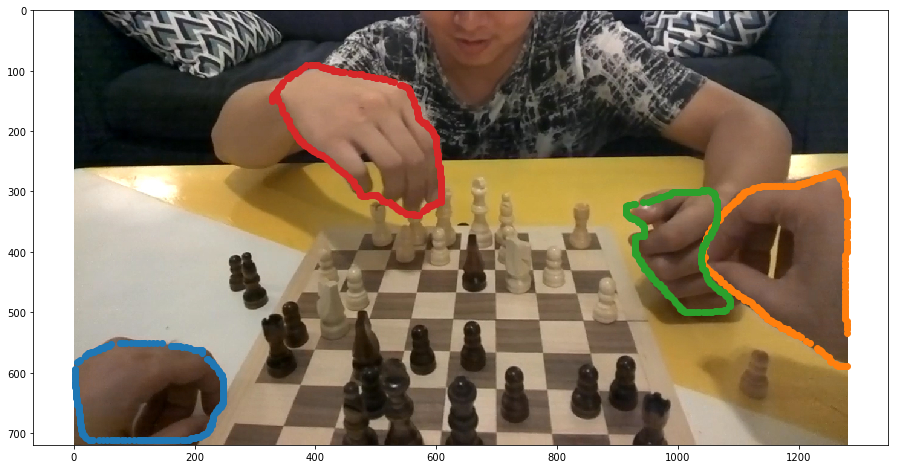

In [1]:
%matplotlib inline

import sys
sys.path.insert(0,'../')
from pak.datasets.EgoHands import EgoHands
from pak import utils 
import matplotlib.pyplot as plt

root = '/home/julian/Data/pak_test1'

egohand = EgoHands(root)

X, Y = egohand.get_raw(memmapped=True)

print("X:", X.shape)
print("Y:", Y.shape)

vidid = 12
imid = 88

im = X[vidid][imid]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.imshow(im)

for hand in Y[vidid][imid]:
    if len(hand[0]) > 0:
        x = hand[:,0]
        y = hand[:,1]
        ax.scatter(x, y)

plt.show()

## AABB

The values in Y are the TOP-RIGHT and the BOTTOM-LEFT point of the bb

X: (48, 100, 720, 1280, 3)
Y: (48, 100)


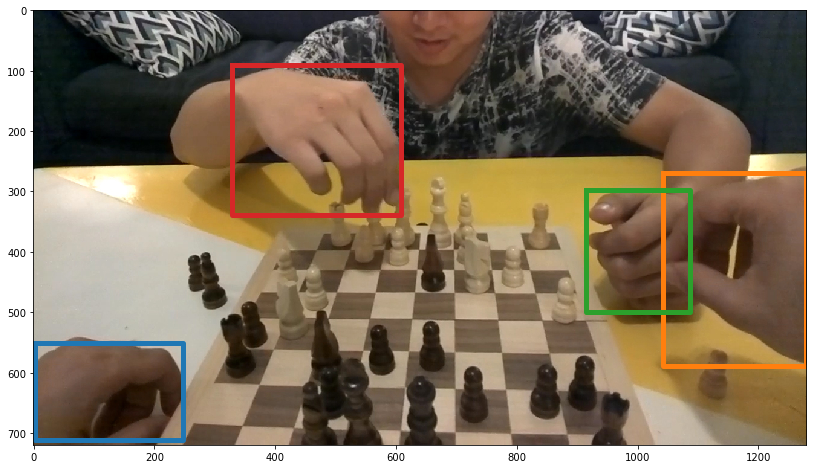

In [2]:
from pak.datasets.EgoHands import EgoHands_config

X, Y_aabb = egohand.get_raw(memmapped=True, config=EgoHands_config.AABB)

print("X:", X.shape)
print("Y:", Y_aabb.shape)

im = X[vidid][imid]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.imshow(im)


for hand in Y_aabb[vidid][imid]:
    w,h = hand[0][0] - hand[1][0],hand[0][1] - hand[1][1] 
    x,y = hand[1][0], hand[1][1]
    
    bbX, bbY = utils.bb_to_plt_plot(x, y, w, h)
    ax.plot(bbX, bbY, linewidth=5)

plt.show()